In [ ]:
# (C) 2021, முத்து அண்ணாமலை <ezhillang@gmail.com>
# இந்த நிரல் பொதுவெளி உரிமத்தில் வைக்கப்படுகிறது.
# இந்த நிரல் வழி ஏற்படும் எந்த விளைவிற்கும் ஆசிரியை
# பொருப்பு ஏற்றுக்கொள்ளமாட்டார்.
# 
# ஒரு நேர் கோட்டு 'linear' தரவை ஆழக்கற்றல்மூலம் எப்படி கண்டறிவது?
# உதாரணத்திற்கு நமது தரவில் X என்ற மாரி ஒரு இரு உருப்படி கொண்ட அணியாக
# எடுத்துக்கொள்ளலாம்; இதன் முதல் மதிப்பு [0,100] என்ற இடைவெளியில் மற்றும்,
# இரண்டாம் மதிப்பு [0,40] என்ற இடைவெளியிலும்
# கொடுக்கப்பட்டிருக்கு (இது ஒரு நபரின் வயது, இடை சுற்றளவு என்றம் வைத்துக்கொள்ளலாம்)
# நபரின் எடை என்பது Y என்ற மாரியில் X என்பதன் சார்பாக விளைகிறது.
# ஆகையால் இந்த சார்புதன்மையை நாம் ஒரு செயற்கை வழி கற்றலின் மூலம்
# எப்படி கற்றுக்கொள்ளலாம் ?

# முதலில் நமது தரவை உருவாக்கலாம்
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Input
from keras.optimizers import adam_v2
from keras.models import Sequential
from math import pi

def எடை_கணக்கிடு( x_மதிப்பு ):
    """ ஒரு நபரின் வயது, இடை சுற்றளவு, ஆகியவையில் இருந்து எடை என்பதை கணக்கிட """
    y_மதிப்பு = x_மதிப்பு[:,0]*4 + (x_மதிப்பு[:,1]/(2*pi))**2 + 20
    return y_மதிப்பு

வயது = np.linspace(0,100,512)
இடை_சுற்றளவு = np.linspace(0,40,40)
X_பயில் = np.array( [[np.random.choice(வயது),np.random.choice(இடை_சுற்றளவு)] for _ in range(512)] )
Y_பயில் = எடை_கணக்கிடு(X_பயில்)

வயது = np.linspace(30,130,100)
இடை_சுற்றளவு = np.linspace(40,60,20)
X_பரிசோதி = np.array( [[np.random.choice(வயது),np.random.choice(இடை_சுற்றளவு)] for _ in range(512)] )
Y_பரிசோதி = எடை_கணக்கிடு(X_பரிசோதி)

# நேர்கோட்டு சார்பு தன்மையை விளக்கம் செய்ய ஒரு
# செயற்கை பின்னலை வரையரை செய்யலாம்
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))

# நாம் உருவாக்கிய மாதிரி எப்படி இருக்கிறது? இரண்டு மரிகள் கொண்டதையே இங்கு காணலாம்
model.summary()

model.compile(optimizer=adam_v2.Adam(learning_rate=0.125),loss='mse')


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# இதை பயில்விக்கலாம் வாங்க!
nepochs=30
history = model.fit(X_பயில்,Y_பயில்,epochs=nepochs,batch_size=128,validation_split=0.2)
print(history.history)
loss = history.history['loss']


Epoch 1/30
4/4 [==============================] - 0s 40ms/step - loss: 52580.7227 - val_loss: 36223.4219
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 23014.6543 - val_loss: 15331.5508
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 15369.1748 - val_loss: 14645.9893
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 11169.2197 - val_loss: 9930.8438
Epoch 5/30
4/4 [==============================] - 0s 10ms/step - loss: 9787.7715 - val_loss: 13128.1338
Epoch 6/30
4/4 [==============================] - 0s 10ms/step - loss: 11547.4434 - val_loss: 11110.4854
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 9212.5596 - val_loss: 9127.3760
Epoch 8/30
4/4 [==============================] - 0s 12ms/step - loss: 8298.6797 - val_loss: 9371.0713
Epoch 9/30
4/4 [==============================] - 0s 12ms/step - loss: 8233.8330 - val_loss: 8947.5986
Epoch 10/30
4/4 [==============================] - 0s 13ms/step

[<tf.Variable 'dense_6/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-0.24633473, -0.94575554, -1.4603648 ,  0.99429315,  1.5480273 ,
        -0.45802143,  0.8898571 , -0.52291274],
       [-0.61481124, -0.27716312, -0.6273725 ,  0.27302548, -0.00271033,
        -0.07500631,  0.84133005, -0.3360913 ]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(8,) dtype=float32, numpy=
array([ 0.        , -0.6997188 , -0.75067824,  1.1047844 ,  1.4316852 ,
        0.        ,  1.1865197 ,  0.        ], dtype=float32)>, <tf.Variable 'dense_7/kernel:0' shape=(8, 8) dtype=float32, numpy=
array([[ 0.5118819 ,  0.5929337 , -0.26628926,  0.23462969,  0.2081911 ,
         0.36126655, -0.102938  , -0.4713796 ],
       [-0.33736986,  0.4119901 ,  1.5254289 ,  1.1382313 ,  0.9609785 ,
         0.43206942,  0.589188  ,  0.40854356],
       [-0.51204437,  0.96366376,  0.22415727,  0.2654613 ,  0.20288908,
        -0.6043953 , -0.45469815, -0.18892688],
       [-0.58159137,  1.123539  ,  1.188075

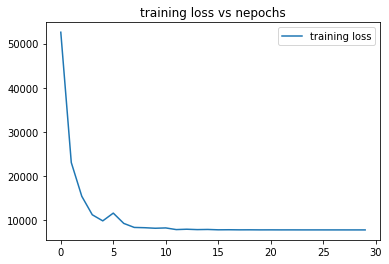

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.


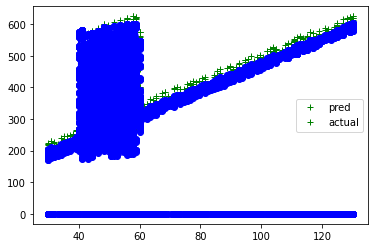

In [ ]:

# இரண்டு மாதிரிகளின் மதிப்பு எண்ண ?
print(model.weights)

# சரி - ஆழக்கற்றல் பின்னல்களின் ஒரு வெளிப்பாடானது
# பயில்விக்கும் சமயம் ஒவ்வொறு கணமும் உள்ள பயிற்சி
# மதிப்பு குறைவு (loss) குறைந்த படியே செல்லவேண்டும்.
# இதனை வரைபடமாக காணலாம்:
plt.plot(np.arange(nepochs),loss)
plt.title('training loss vs nepochs')
plt.legend(['training loss'])
plt.show()

# அடுத்த பயில்விக்காத தரவின்மீது எமது செயற்கைபின்னல்
# எப்படி செயல்படுகிறது? இதையும் இங்கு காணலாம்
Y_யுகித்த = model.predict(np.array(X_பரிசோதி))
plt.plot(X_பரிசோதி,Y_பரிசோதி,'+g',X_பரிசோதி,Y_யுகித்த,'-ob')
plt.legend(['pred','actual'])
plt.show()
